# Full process of business unsupervised model

### 1. Import data:

In [1]:
from datetime import datetime
statime=datetime.now()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [3]:
path = os.getcwd()

In [4]:
print('LOAD DURATION: ', datetime.now() - statime)

LOAD DURATION:  0:00:00.477071


In [5]:
%%time
mydata = pd.read_csv(path+'/NY property data.csv')

CPU times: user 3.66 s, sys: 644 ms, total: 4.31 s
Wall time: 4.31 s


In [6]:
mydata.shape

(1070994, 32)

In [7]:
mydata.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
RECORD,1,2,3,4,5,6,7,8,9,10
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001,1000030002,1000030003,1000030010,1000041001,1000041002
B,1,1,1,1,1,1,1,1,1,1
BLOCK,1,1,2,2,3,3,3,3,4,4
LOT,101,201,1,23,1,2,3,10,1001,1002
EASEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION,PARKS AND RECREATION,PARKS AND RECREATION,DEPT RE-CITY OF NY,"TRZ HOLDINGS, LLC","TRZ HOLDINGS, LLC"
BLDGCL,P7,Z9,Y7,T2,Q1,Q1,Q1,Z9,R5,R5
TAXCLASS,4,4,4,4,4,4,4,4,4,4
LTFRONT,500,27,709,793,323,496,180,362,0,0


___

### 2. DQR sample:

In [8]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)

<AxesSubplot:>

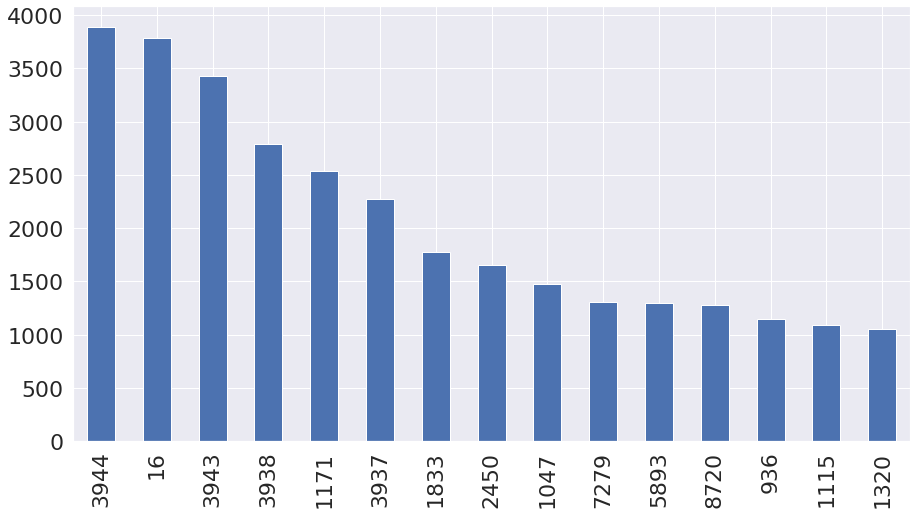

In [9]:
mydata['BLOCK'].value_counts().head(15).plot(kind='bar')

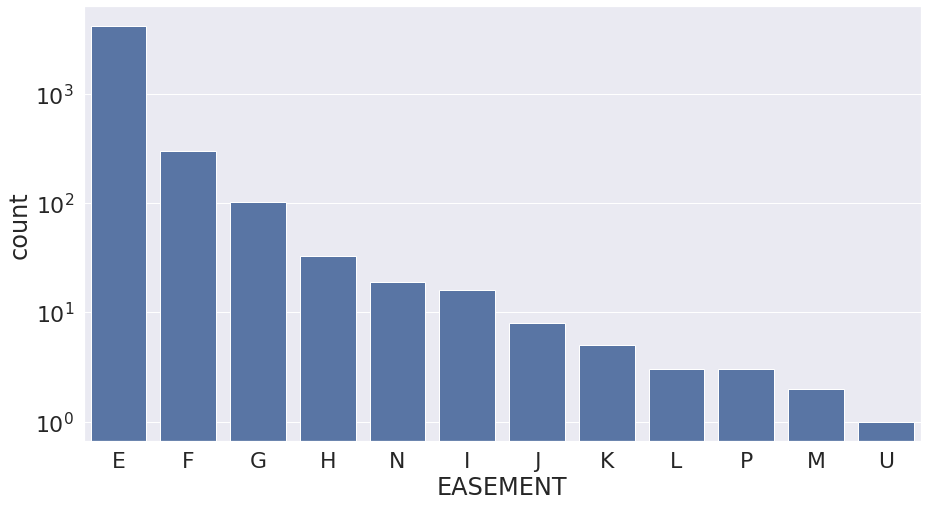

In [10]:
plot = sns.countplot(x='EASEMENT', data = mydata, color = 'b', order = mydata['EASEMENT'].value_counts().index)
plot.set_yscale('log')
plt.savefig('hist.png')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


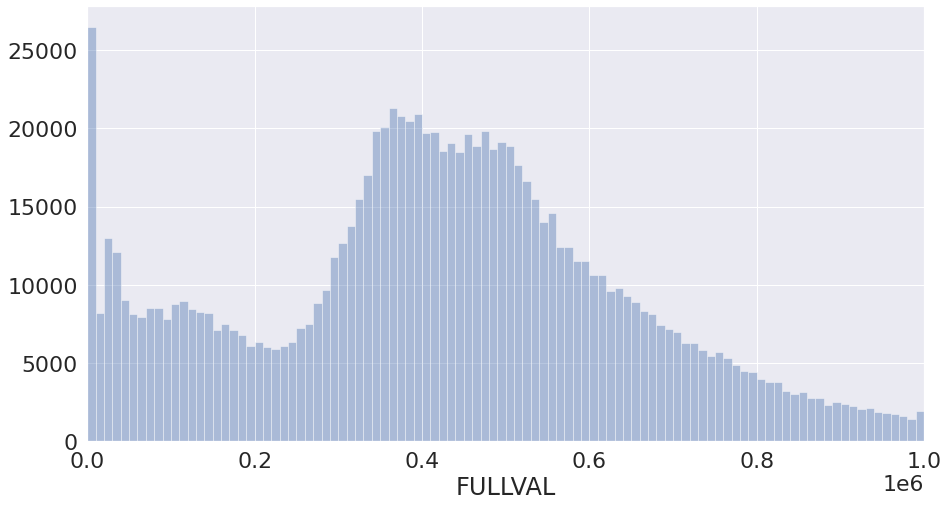

In [11]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = mydata[mydata['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=100, kde=False)
plt.savefig('dist good.png')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


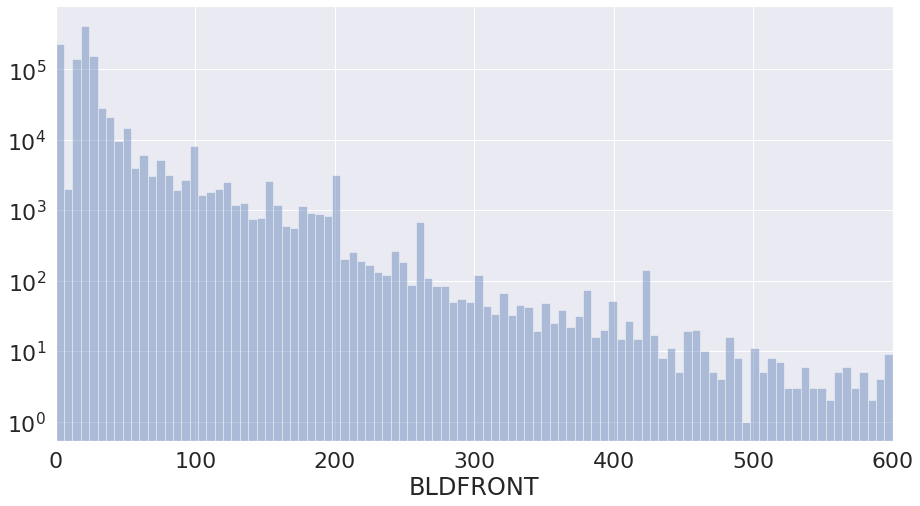

In [12]:
xhigh = 600
plt.xlim(0,xhigh)
temp = mydata[mydata['BLDFRONT'] <= xhigh]
sns.distplot(temp['BLDFRONT'],bins=100, kde=False).set_yscale('log')
plt.savefig('dist good.png')

___

### 3. Data cleaning:

In [13]:
data=mydata

In [14]:
remove_list = ['PARKCHESTER PRESERVAT',
              'PARKS AND RECREATION',
              'DCAS',
              'HOUSING PRESERVATION',
              'CITY OF NEW YORK',
              'DEPT OF ENVIRONMENTAL',
              'BOARD OF EDUCATION',
              'NEW YORK CITY HOUSING',
              'CNY/NYCTA',
              'NYC HOUSING PARTNERSH',
              'DEPARTMENT OF BUSINES',
              'DEPT OF TRANSPORTATIO',
              'MTA/LIRR',
              'PARCKHESTER PRESERVAT',
              'MH RESIDENTIAL 1, LLC',
              'LINCOLN PLAZA ASSOCIA',
              'UNITED STATES OF AMER',
              'U S GOVERNMENT OWNRD',
              'THE CITY OF NEW YORK',
              'NYS URBAN DEVELOPMENT',
              'NYS DEPT OF ENVIRONME',
              'CULTURAL AFFAIRS',
              'DEPT OF GENERAL SERVI',
              'DEPT RE-CITY OF NY']

In [15]:
property_data = data[~data['OWNER'].isin(remove_list)].copy().reset_index()

In [16]:
missing_zips = np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

21772

In [17]:
#give missing zip
for i in range(len(missing_zips)) :
    if(property_data.loc[missing_zips[i]+1,'ZIP'] == property_data.loc[missing_zips[i]-1,'ZIP']):
        property_data.loc[missing_zips[i],'ZIP'] = property_data.loc[missing_zips[i]-1,'ZIP']

In [18]:
missing_zips = np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

10245

In [19]:
for i in range(len(missing_zips)) :
    property_data.loc[missing_zips[i],'ZIP'] = property_data.loc[missing_zips[i]-1,'ZIP']

missing_zips = np.where(pd.isnull(property_data['ZIP']))[0]
len(missing_zips)

0

In [20]:
#giving value to missing 3 VALUEs
property_data['FULLVAL'].replace('NaN',0)
temp =  property_data[property_data['FULLVAL']!=0]
mean_fullval = temp.groupby('TAXCLASS')['FULLVAL'].mean()

property_data['AVLAND'].replace('NaN',0)
temp_avland =  property_data[property_data['AVLAND']!=0]
mean_avland = temp.groupby('TAXCLASS')['AVLAND'].mean()

property_data['AVTOT'].replace('NaN',0)
temp_avtot =  property_data[property_data['AVTOT']!=0]
mean_avtot = temp.groupby('TAXCLASS')['AVTOT'].mean()

print(mean_fullval,mean_avland,mean_avtot)

TAXCLASS
1     5.700059e+05
1A    3.352942e+05
1B    3.738399e+05
1C    7.615359e+05
1D    2.233614e+07
2     8.005832e+05
2A    8.639066e+05
2B    1.254525e+06
2C    7.723493e+05
3     8.510005e+04
4     2.772747e+06
Name: FULLVAL, dtype: float64 TAXCLASS
1      14901.860425
1A      2247.472465
1B      9185.394750
1C      8225.658898
1D    709303.793103
2      88470.593368
2A     31370.740197
2B     54607.394911
2C     25633.567760
3      28135.636364
4     444996.049088
Name: AVLAND, dtype: float64 TAXCLASS
1     2.502549e+04
1A    1.437036e+04
1B    9.189080e+03
1C    2.898447e+04
1D    1.166866e+06
2     3.602638e+05
2A    7.963525e+04
2B    1.790961e+05
2C    1.170418e+05
3     3.829505e+04
4     1.294237e+06
Name: AVTOT, dtype: float64


In [21]:
#give value to missing part
for index in mean_fullval.index:
    property_data.loc[(property_data['FULLVAL'] == 0)&(property_data['TAXCLASS'] == index), 'FULLVAL'] = mean_fullval[index]
    property_data.loc[(property_data['AVLAND'] == 0)&(property_data['TAXCLASS'] == index), 'AVLAND'] = mean_avland[index]
    property_data.loc[(property_data['AVTOT'] == 0)&(property_data['TAXCLASS'] == index), 'AVTOT'] = mean_avtot[index]
    
#give value to missing STORIES by group
temp = property_data[property_data["STORIES"].isnull()]
len(temp)    
    

43968

In [22]:
temp['TAXCLASS'].value_counts()
mean_stories = property_data.groupby('TAXCLASS')['STORIES'].mean()
print(mean_stories)
len(property_data[property_data['STORIES']==0])

TAXCLASS
1      2.111633
1A     1.656867
1B     4.000000
1C     3.052748
1D     1.068966
2     16.310549
2A     2.844032
2B     4.001635
2C     4.744977
3      1.000000
4      5.517257
Name: STORIES, dtype: float64


0

In [23]:
property_data["STORIES"] = property_data["STORIES"].fillna(value = 0)
for index in mean_stories.index:
    property_data.loc[(property_data['STORIES'] == 0)&(property_data['TAXCLASS'] == index), 'STORIES'] = mean_stories[index]

property_data.head().transpose()

,0,1,2,3,4
index,0,1,8,9,10
RECORD,1,2,9,10,11
BBLE,1000010101,1000010201,1000041001,1000041002,1000041003
B,1,1,1,1,1
BLOCK,1,1,4,4,4
LOT,101,201,1001,1002,1003
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,"TRZ HOLDINGS, LLC","TRZ HOLDINGS, LLC","TRZ HOLDINGS, LLC"
BLDGCL,P7,Z9,R5,R5,R5
TAXCLASS,4,4,4,4,4


In [24]:
#0 and 1 are unreasonable, so give it nan
property_data.loc[property_data['LTFRONT']==0,'LTFRONT']=np.nan
property_data.loc[property_data['LTDEPTH']==0,'LTDEPTH']=np.nan
property_data.loc[property_data['BLDFRONT']==0,'BLDFRONT']=np.nan
property_data.loc[property_data['BLDDEPTH']==0,'BLDDEPTH']=np.nan
property_data.loc[property_data['LTFRONT']==1,'LTFRONT']=np.nan
property_data.loc[property_data['LTDEPTH']==1,'LTDEPTH']=np.nan
property_data.loc[property_data['BLDFRONT']==1,'BLDFRONT']=np.nan
property_data.loc[property_data['BLDDEPTH']==1,'BLDDEPTH']=np.nan

In [25]:
#give value to missing length and depth
mean_LTFRONT = property_data.groupby(property_data['TAXCLASS'])['LTFRONT'].mean()
mean_LTDEPTH = property_data.groupby(property_data['TAXCLASS'])['LTDEPTH'].mean()
mean_BLDFRONT = property_data.groupby(property_data['TAXCLASS'])['BLDFRONT'].mean()
mean_BLDDEPTH = property_data.groupby(property_data['TAXCLASS'])['BLDDEPTH'].mean()

In [26]:
for index in mean_LTFRONT.index:
    property_data.loc[(property_data['LTFRONT'].isnull())&(property_data['TAXCLASS']==index),'LTFRONT']=mean_LTFRONT[index]    
    property_data.loc[(property_data['LTDEPTH'].isnull())&(property_data['TAXCLASS']==index),'LTDEPTH']=mean_LTDEPTH[index]
    property_data.loc[(property_data['BLDFRONT'].isnull())&(property_data['TAXCLASS']==index),'BLDFRONT']=mean_BLDFRONT[index]
    property_data.loc[(property_data['BLDDEPTH'].isnull())&(property_data['TAXCLASS']==index),'BLDDEPTH']=mean_BLDDEPTH[index]

property_data['ZIP'] = property_data['ZIP'].astype(str)
property_data['zip3'] = property_data['ZIP'].str[:3]

___

### 4. Variables engineering:

In [27]:
#calculate area
property_data['ltsize'] = property_data['LTFRONT']* property_data['LTDEPTH']
property_data['bldsize'] = property_data['BLDFRONT']* property_data['BLDDEPTH']
property_data['bldvol'] = property_data['bldsize']* property_data['STORIES']

#3 kinds of value to 3 kinds of areas
property_data['r1'] = property_data['FULLVAL']/property_data['ltsize']
property_data['r2'] = property_data['FULLVAL']/property_data['bldsize']
property_data['r3'] = property_data['FULLVAL']/property_data['bldvol']
property_data['r4'] = property_data['AVLAND']/property_data['ltsize']
property_data['r5'] = property_data['AVLAND']/property_data['bldsize']
property_data['r6'] = property_data['AVLAND']/property_data['bldvol']
property_data['r7'] = property_data['AVTOT']/property_data['ltsize']
property_data['r8'] = property_data['AVTOT']/property_data['bldsize']
property_data['r9'] = property_data['AVTOT']/property_data['bldvol']

ninevars = ['r1','r2','r3','r4','r5','r6','r7','r8','r9']
zip5_mean = property_data.groupby('ZIP')[ninevars].mean()
zip3_mean = property_data.groupby('zip3')[ninevars].mean()
taxclass_mean = property_data.groupby('TAXCLASS')[ninevars].mean()
borough_mean = property_data.groupby('B')[ninevars].mean()
#four logical groups' mean and each groups' 9 unit price
property_data = property_data.join(zip5_mean, on='ZIP', rsuffix='_zip5')
property_data = property_data.join(zip3_mean, on='zip3', rsuffix='_zip3')
property_data = property_data.join(taxclass_mean, on='TAXCLASS', rsuffix='_taxclass')
property_data = property_data.join(borough_mean, on='B', rsuffix='_boro')
#join get the group mean, two for loops get the value:group value ratio
rsuffix = ['_zip5', '_zip3', '_taxclass', '_boro']
for var in ninevars:
    for r in rsuffix:
        property_data[str(var)+r] = property_data[var] / property_data[str(var)+r]
        
pd.set_option('display.max_columns',None)
property_data.head(3)

,index,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,zip3,ltsize,bldsize,bldvol,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,r2_zip5,r3_zip5,r4_zip5,r5_zip5,r6_zip5,r7_zip5,r8_zip5,r9_zip5,r1_zip3,r2_zip3,r3_zip3,r4_zip3,r5_zip3,r6_zip3,r7_zip3,r8_zip3,r9_zip3,r1_taxclass,r2_taxclass,r3_taxclass,r4_taxclass,r5_taxclass,r6_taxclass,r7_taxclass,r8_taxclass,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.000000,1046.000000,NaN,5.517257,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,62.082133,86.29671,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,100,523000.000000,5357.483793,29558.615789,40.917782,3994.412456,723.985188,8.079350,788.709805,142.953243,18.413002,1797.485605,325.793334,0.096029,7.971259,16.568754,0.144029,11.342727,24.152924,0.103074,8.485601,19.653056,0.110958,7.528436,6.326542,0.232614,16.023011,13.173709,0.192071,13.592982,14.430166,0.156462,10.128397,4.921862,0.184730,10.040530,4.062480,0.155266,9.655463,4.715588,0.113902,7.712077,6.469193,0.241395,16.606463,13.685555,0.198288,14.042014,14.957255
1,1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.000000,124.443774,NaN,5.517257,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,62.082133,86.29671,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,100,3359.981897,5357.483793,29558.615789,57678.882190,36173.697854,6556.463990,4258.951518,2671.030012,484.122805,25955.496986,16278.164034,2950.408795,135.364878,72.188316,150.047876,75.923415,38.413069,81.795845,145.295381,76.846241,177.979544,156.410059,68.178075,57.293640,122.620049,54.263231,44.613839,270.749329,123.099061,130.680659,220.553266,91.723521,44.572753,97.378645,34.003074,13.757918,218.867838,87.440591,42.704717,160.560217,69.841147,58.585497,127.249184,56.239138,46.347249,279.513149,127.165526,135.454020
2,8,9,1000041001,1,4,1001,NaN,"TRZ HOLDINGS, LLC",R5,4,82.296384,124.443774,NaN,50.000000,3944762.0,636093.0,1775143.0,0.0,0.0,NaN,1 WATER STREET,10004.0,NaN,62.082133,86.29671,636093.0,2049290.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,100,10241.272557,5357.483793,267874.189672,385.182796,736.308714,14.726174,62.110738,118.729804,2.374596,173.332268,331.338940,6.626779,0.903974,1.469379,0.337016,1.107235,1.707497,0.401204,0.970291,1.564191,0.399752,1.044515,1.387752,0.128685,1.788239,2.412052,0.218828,1.808079,2.505658,0.293516,1.472867,1.867015,0.100113,1.420129,1.511469,0.067482,1.461612,1.779837,0.095917,1.072230,1.421603,0.131586,1.855748,2.499883,0.227331,1.866605,2.588430,0.304237


In [28]:
output = property_data.iloc[:,37:]

___

### 5. PCA to decrease dimension and correlation:

In [29]:
data_orig = output.copy()
data_mod = output.copy()
data_mod = (data_mod - data_mod.mean()) / data_mod.std()

In [30]:
import sklearn.decomposition
import matplotlib.pyplot as plt

(0.0, 1.0)

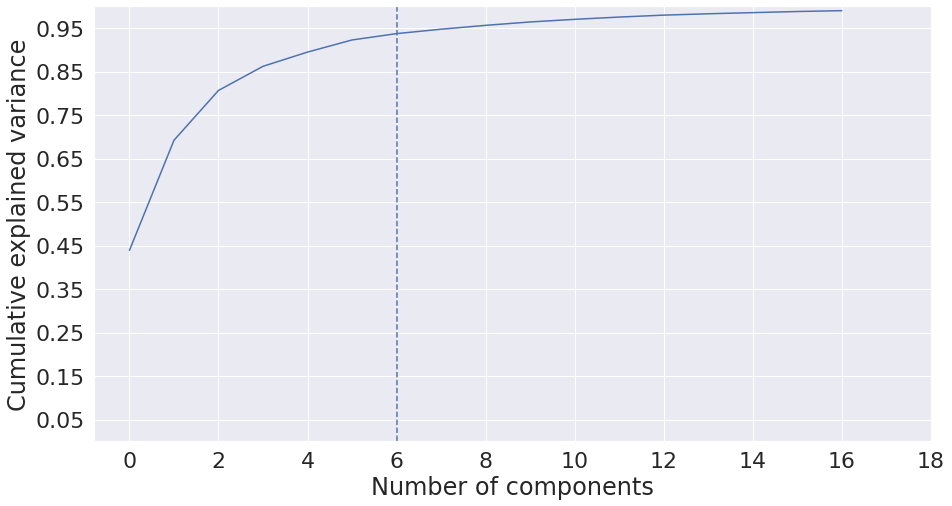

In [31]:
pca = sklearn.decomposition.PCA(n_components = .99, svd_solver = 'full')
pca.fit(data_mod)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.yticks(np.arange(0.05, 1.1, step=.1))
plt.xticks(np.arange(0, 20, step=2))
plt.axvline(x=6, linestyle='--')
plt.ylim(0,1)

In [32]:
pca = sklearn.decomposition.PCA(n_components = 6)
princ_comps = pca.fit_transform(data_mod)
data_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)])
data_pca.shape

(1046826, 6)

In [33]:
pca_mean = data_pca.mean()
pca_sd = data_pca.std()
data_pca = (data_pca - pca_mean) / pca_sd
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,1.046826e+06,1.046826e+06,1.046826e+06,1.046826e+06,1.046826e+06,1.046826e+06
mean,-1.102848e-16,2.714494e-16,3.257772e-16,2.811624e-15,1.870877e-15,2.500549e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.585169e-01,-2.280285e+02,-1.990058e+02,-2.023902e+02,-2.438866e+02,-2.002481e+02
25%,-1.088008e-01,-1.544611e-01,-1.356178e-01,-3.269413e-02,-1.159058e-01,-1.101845e-01
50%,-2.375699e-02,-5.919442e-02,6.965009e-04,1.366909e-02,-1.313768e-02,-2.535217e-02
75%,3.290240e-02,3.225958e-02,3.206016e-01,7.018401e-02,4.879484e-02,1.382268e-01
max,6.907817e+02,3.239819e+02,5.967327e+02,2.507935e+02,4.068852e+02,4.017213e+02


___

### 6. Euclidean distance and autoencoder to produce a math score as a measurament of abnormality:

In [34]:
p=2
one_over_p = 1/p
score1 = (((data_pca).abs()**p).sum(axis=1))**one_over_p

In [35]:
from keras.models import Model
from keras.layers import Input, Dense
# placeholder for input
data_in = Input(shape=(6,))
# dimension of the encoded data. Choose 3
encoded_dim = 3
# encoded representation of the data
encoded = Dense(encoded_dim, activation='tanh')(data_in)
# reconstruction of the input
decoded = Dense(6,activation='tanh')(encoded)
# this model maps the input data to the reconstructed data
autoencoder = Model(data_in, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(data_pca,data_pca, epochs=3, shuffle=True, validation_data=(data_pca,data_pca))

pca_out = autoencoder.predict(data_pca)
error = pca_out - data_pca
p=2
oop=1/p
score2 = ((error.abs()**p).sum(axis=1))**oop

Epoch 1/3
32714/32714 [==============================] - 56s 2ms/step - loss: 1.0741 - val_loss: 0.8952
Epoch 2/3
32714/32714 [==============================] - 51s 2ms/step - loss: 0.8732 - val_loss: 0.8942
Epoch 3/3
32714/32714 [==============================] - 51s 2ms/step - loss: 0.7592 - val_loss: 0.8938


___

### 7. Quantile Binning to build final ensemble model:

In [36]:
scores = pd.DataFrame(score1)
scores.columns=['score1']
scores['score2'] = score2
scores['score1 rank'] = scores['score1'].rank()
scores['score2 rank'] = scores['score2'].rank()
scores['final'] = (scores['score1 rank'] + scores['score2 rank'])/2

In [37]:
scores.head(5)

,score1,score2,score1 rank,score2 rank,final
0,3.811852,2.412035,1032993.0,1033696.0,1033344.5
1,88.407826,86.139366,1046749.0,1046748.0,1046748.5
2,0.590118,0.566832,894887.0,1001236.0,948061.5
3,0.941792,0.805813,978678.0,1013091.0,995884.5
4,2.002904,1.266614,1019632.0,1024042.0,1021837.0


In [38]:
scores.shape

(1046826, 5)

In [39]:
property_data.shape

(1046826, 82)

In [40]:
result = pd.concat([property_data, scores], axis=1)
result.shape

(1046826, 87)

In [41]:
top_records = result.sort_values(['final'], ascending = False).head(100)

spreadsheet1 = top_records.iloc[:,1:33]
spreadsheet2 = top_records.iloc[:,[82,83,86]]

spreadsheet = pd.concat([spreadsheet1, spreadsheet2],axis = 1)

spreadsheet.head(5)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1,score2,final
898846,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.0,124.443774,NaN,3.000000,3.740199e+08,1.792809e+09,4.668309e+09,1.792809e+09,4.668309e+09,2198.0,154-68 BROOKVILLE BOULEVARD,11422.0,X4,62.082133,86.296710,1.644454e+09,4.501180e+09,1.644454e+09,4.501180e+09,NaN,FINAL,2010/11,AC-TR,981.327263,981.960488,1046826.0
667828,684704,4036590105,4,3659,105,NaN,W RUFERT,V0,1B,2.0,2.000000,NaN,4.000000,3.738399e+05,9.185395e+03,9.189080e+03,0.000000e+00,0.000000e+00,NaN,69 STREET,11385.0,NaN,39.500000,82.666667,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,457.056920,455.621033,1046825.0
1042136,1065870,5076440001,5,7644,1,NaN,PEOPLE OF THE ST OF N,V0,1B,2891.0,1488.000000,NaN,4.000000,2.901746e+08,1.741048e+07,1.741048e+07,1.741048e+07,1.741048e+07,3390.0,HYLAN BOULEVARD,10309.0,X7,39.500000,82.666667,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,448.088290,446.653614,1046824.0
1036415,1059883,5069770012E,5,6977,12,E,NaN,Z7,4,5.0,5.000000,NaN,5.517257,2.772747e+06,4.449960e+05,1.294237e+06,0.000000e+00,0.000000e+00,NaN,SAGONA COURT,10309.0,NaN,62.082133,86.296710,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,407.134455,405.093650,1046823.0
148125,151044,2024930001,2,2493,1,NaN,NaN,Q6,4,798.0,611.000000,NaN,6.000000,1.663775e+09,7.875000e+07,7.486988e+08,7.875000e+07,7.486988e+08,2500.0,1 EAST 161 STREET,10451.0,NaN,62.082133,86.296710,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,396.025137,394.799546,1046822.0


In [42]:
spreadsheet1 = top_records.iloc[:,1:33]
spreadsheet2 = top_records.iloc[:,[82,83,86]]

In [43]:
spreadsheet = pd.concat([spreadsheet1, spreadsheet2],axis = 1)

___

### The record that are abnormal:

In [47]:
spreadsheet.sort_values(by='final').head(100)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1,score2,final
53154,53684,1009390028,1,939,28,NaN,377 EAST 33RD FEE LLC,D9,2,25.0,98.000000,NaN,23.000000,4.850000e+07,3.762000e+06,2.182500e+07,0.000000e+00,0.000000e+00,NaN,347 EAST 33 STREET,10016.0,NaN,113.000000,125.000000,3.816000e+06,2.282400e+07,NaN,NaN,NaN,FINAL,2010/11,AC-TR,76.106676,74.552109,1046727.0
54367,54899,1009440001,1,944,1,NaN,"301 HOLDINGS, LLC C/O",D6,2,98.0,100.000000,NaN,16.000000,1.850000e+07,2.367000e+06,8.325000e+06,0.000000e+00,0.000000e+00,NaN,710 2 AVENUE,10016.0,NaN,13.000000,40.000000,2.367000e+06,7.560000e+06,NaN,NaN,NaN,FINAL,2010/11,AC-TR,76.218137,74.777843,1046728.0
954279,975053,5014911008E,5,1491,1008,E,NaN,Z7,4,10.0,10.000000,NaN,5.517257,2.772747e+06,4.449960e+05,1.294237e+06,0.000000e+00,0.000000e+00,NaN,NaN,10314.0,NaN,62.082133,86.296710,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,77.118783,75.290604,1046732.5
549533,565397,3085910075,3,8591,75,NaN,U S GOVT NAVY,Y4,4,441.0,524.000000,NaN,5.517257,3.520000e+08,1.453500e+08,1.584000e+08,1.453500e+08,1.584000e+08,4500.0,FLATBUSH AVENUE,11229.0,X3,62.082133,86.296710,1.420200e+08,1.550700e+08,1.420200e+08,1.550700e+08,NaN,FINAL,2010/11,AC-TR,76.491127,75.351939,1046732.5
954281,975055,5014911009E,5,1491,1009,E,NaN,Z7,4,10.0,10.000000,NaN,5.517257,2.772747e+06,4.449960e+05,1.294237e+06,0.000000e+00,0.000000e+00,NaN,NaN,10314.0,NaN,62.082133,86.296710,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,77.118783,75.290604,1046732.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148125,151044,2024930001,2,2493,1,NaN,NaN,Q6,4,798.0,611.000000,NaN,6.000000,1.663775e+09,7.875000e+07,7.486988e+08,7.875000e+07,7.486988e+08,2500.0,1 EAST 161 STREET,10451.0,NaN,62.082133,86.296710,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,396.025137,394.799546,1046822.0
1036415,1059883,5069770012E,5,6977,12,E,NaN,Z7,4,5.0,5.000000,NaN,5.517257,2.772747e+06,4.449960e+05,1.294237e+06,0.000000e+00,0.000000e+00,NaN,SAGONA COURT,10309.0,NaN,62.082133,86.296710,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,407.134455,405.093650,1046823.0
1042136,1065870,5076440001,5,7644,1,NaN,PEOPLE OF THE ST OF N,V0,1B,2891.0,1488.000000,NaN,4.000000,2.901746e+08,1.741048e+07,1.741048e+07,1.741048e+07,1.741048e+07,3390.0,HYLAN BOULEVARD,10309.0,X7,39.500000,82.666667,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,448.088290,446.653614,1046824.0
667828,684704,4036590105,4,3659,105,NaN,W RUFERT,V0,1B,2.0,2.000000,NaN,4.000000,3.738399e+05,9.185395e+03,9.189080e+03,0.000000e+00,0.000000e+00,NaN,69 STREET,11385.0,NaN,39.500000,82.666667,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,457.056920,455.621033,1046825.0
